In [6]:
import os
import sqlite3
import pandas as pd
import numpy as np
import datetime
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
conn = sqlite3.connect(r"../../diplom.db")
cur = conn.cursor()

In [3]:
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from VZGLYAD;""").fetchall()]
graph = [i[0] for text in corpus for i in nltk.bigrams(text) if i[1] == "демократия"]
c = Counter(graph)
adjusting = pd.DataFrame(c.most_common()).rename(columns={0: "Слово", 1: "Количество"})
adjusting["Часть"] = [i[1] for i in nltk.pos_tag(adjusting["Слово"], lang="rus")]
adj = adjusting[adjusting["Часть"].isin(["A=m", "A-PRO=m"])].reset_index(drop=True)
s = adj["Количество"].sum()
adj["Процент"] = round(adj["Количество"]/s*100, 2)

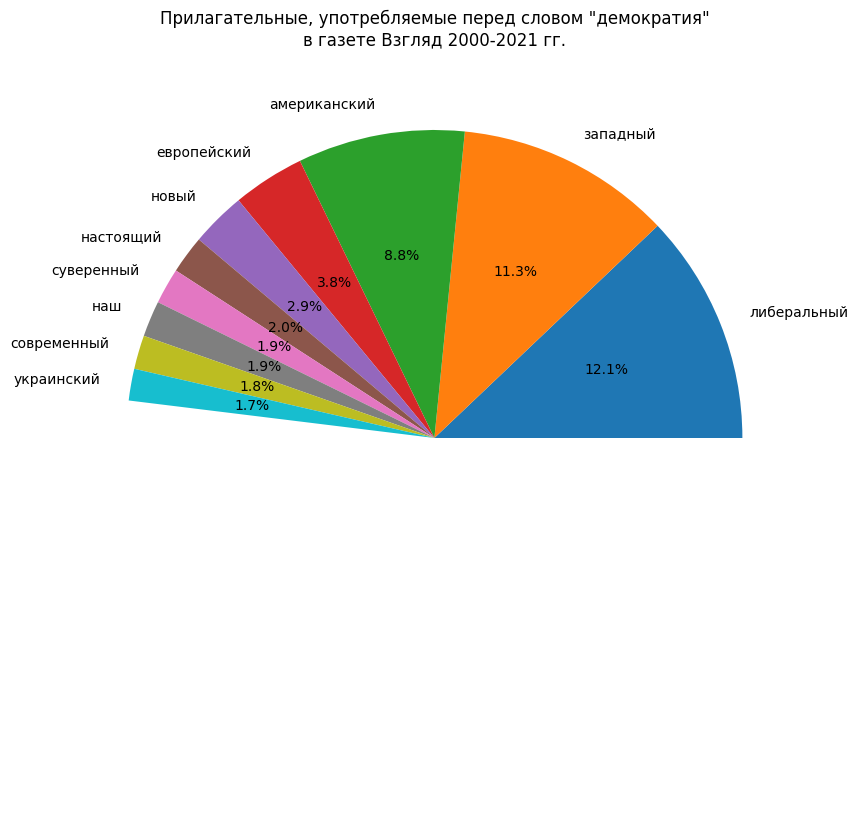

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True)
temp2 = adj[["Слово", "Процент"]].head(10)
temp2.loc[10, "Слово"] = "Ост."
temp2.loc[10, "Процент"] = adj.loc[10:, "Процент"].sum()
wedge, text, procent = ax.pie(temp2["Процент"], labels=temp2["Слово"], autopct='%1.1f%%')
wedge[10].set_visible(False)
text[10].set_visible(False)
procent[10].set_visible(False)
ax.set_title('Прилагательные, употребляемые перед словом "демократия"\nв газете Взгляд 2000-2021 гг.')
fig.savefig("vzglyad_adj.png")

In [8]:
%%time
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from VZGLYAD""").fetchall()]
model = Word2Vec(corpus, 
                 vector_size=1024,      # embedding vector size
                 min_count=2,
                 window=5)
model.save("vzglyad.model")
model.wv.save("vzglyad.wordvectors")
model.wv.most_similar('демократия')

CPU times: total: 17min 15s
Wall time: 8min 43s


[('демократический', 0.705778181552887),
 ('либерализм', 0.6594206094741821),
 ('диктатура', 0.6432538032531738),
 ('светоч', 0.5974670648574829),
 ('тоталитаризм', 0.5753818154335022),
 ('социализм', 0.5693466067314148),
 ('демократичный', 0.5667052865028381),
 ('свобода', 0.5615435242652893),
 ('политкорректность', 0.5565980672836304),
 ('капитализм', 0.555891215801239)]

In [19]:
cur.close()
conn.close()